In [1]:
# Import the driver Overlay class
# from axi_stream_driver import NeuralNetworkOverlay
from pynq.overlays.base import BaseOverlay

In [2]:
import numpy as np
X_test = np.load('X_test_NRN.npy')
y_test = np.load('y_test_NRN.npy')
X_test = X_test[:50]*256
y_test = y_test[:50]

In [3]:
base = BaseOverlay("base.bit")

In [4]:
print(X_test.shape)

(10, 32, 32, 3)


In [5]:
from pynq.lib.video import *
#from pynq.lib.video import hierarchies

In [6]:
# monitor configuration: 640*480 @ 60Hz
Mode = VideoMode(640,480,24)
#hdmi_out = base.video.hdmi_out
hdmi_out = base.video.hdmi_out
hdmi_out.configure(Mode,PIXEL_BGR)
hdmi_out.start()

In [7]:
# initialize camera from OpenCV
import cv2 as cv

videoIn = cv.VideoCapture(-1)
videoIn.set(cv.CAP_PROP_FRAME_WIDTH, 640);
videoIn.set(cv.CAP_PROP_FRAME_HEIGHT, 480);

print("Capture device is open: " + str(videoIn.isOpened()))

Capture device is open: True


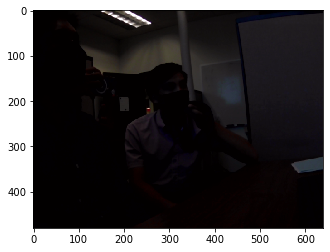

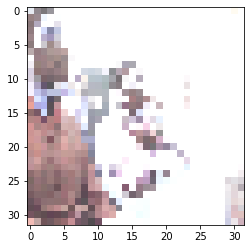

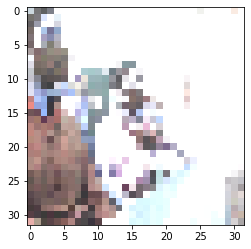

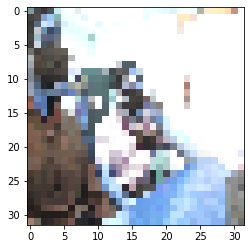

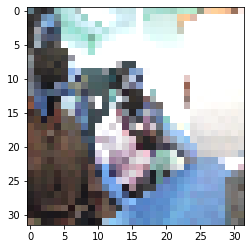

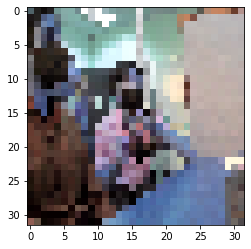

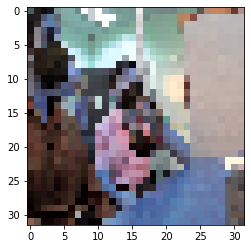

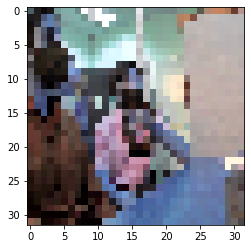

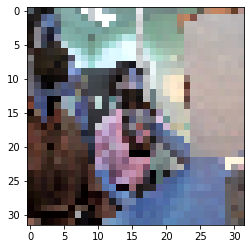

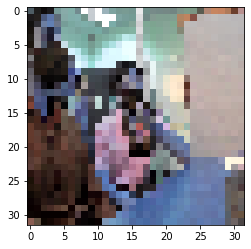

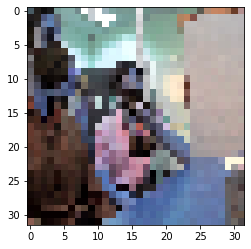

In [8]:
# Output webcam image as JPEG
ret, frame = videoIn.read()
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np
plt.imshow(frame[:,:,[2,1,0]])
plt.show()

resized_images = []

for i in range(10):
    
    ret, frame = videoIn.read()
    cropped_frame = frame[0:480][0:480]
    resized = cv.resize(cropped_frame, (32, 32))
    resized_images.append(resized)
    
    plt.imshow(resized)
    plt.show()

In [9]:
resized_images = np.array(resized_images)
print(resized_images.shape)

# percent_label, latency, throughput = nn.predict(resized_images, debug=True, profile=True)

(10, 32, 32, 3)


In [10]:
import sys, inspect
clsmembers = inspect.getmembers(sys.modules[__name__], inspect.isclass)
print(clsmembers)

[('BaseOverlay', <class 'pynq.overlays.base.base.BaseOverlay'>), ('DrmDriver', <class 'pynq.lib.video.drm.DrmDriver'>), ('PixelFormat', <class 'pynq.lib.video.common.PixelFormat'>), ('PynqBuffer', <class 'pynq.buffer.PynqBuffer'>), ('VideoMode', <class 'pynq.lib.video.common.VideoMode'>)]


In [ ]:
ret, frame = videoIn.read()
cropped_frame = frame[0:480, 0:480]
resized = cv.resize(cropped_frame, (32, 32))

%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np
plt.imshow(resized)
plt.show()

In [ ]:
# y_hw, latency, throughput = nn.predict(resized, debug=True, profile=True)

In [ ]:
x,y,w,h = 300,0,100,40
import time
start = time.time()
for NumOfFrames in range (3): 
    ret, frame = videoIn.read()
    output_frame = hdmi_out.newframe()
    output_frame[:] = frame
    hdmi_out.writeframe(output_frame)
    if (ret):
        cv.rectangle(frame, (x,y), (x + w, y + h), (0,0,0), -1)
        cv.putText(img=frame, text="NRN06_HDMI",org=(x+int(w/10),y+int(4*h/5)), fontFace=cv.FONT_HERSHEY_DUPLEX, fontScale=1, color=(255,0,0), thickness=1)

        %matplotlib inline 
        from matplotlib import pyplot as plt
        import numpy as np
        plt.imshow(resized)
        plt.show()
    else:
        raise RuntimeError("Failed to read from camera.")
end = time.time()

In [11]:
# Capture webcam video and display to HDMI Output
#import numpy as np
x,y,w,h = 300,0,500,40
display_text = "Headphones: 87%"
import time
start = time.time()
for NumOfFrames in range (100): 
    ret, frame = videoIn.read()
    if (ret):
        outframe = hdmi_out.newframe()
        crop_frame = frame[0:480, 0:480]
        outframe[0:480,0:640,:] = frame[0:480,0:640,:]        
        cv.rectangle(outframe, (x,y), (x + w, y + h), (0,0,0), -1)
        cv.putText(img=outframe, text = display_text,org=(x+int(w/10),y+int(4*h/5)), fontFace=cv.FONT_HERSHEY_DUPLEX, fontScale=1, color=(255,0,0), thickness=1)
        #outframe[0:32,0:32,:] = crop_frame[0:32,0:32,:]
        #outframe = cv.resize(crop_frame,None,fx=(1/15),fy=(1/15),interpolation=cv.INTER_AREA)
        hdmi_out.writeframe(outframe)
    else:
        raise RuntimeError("Failed to read from camera.")
end = time.time()
print("Frames per second:     " + str(50 / (end - start)))

Frames per second:     6.517044269431691


In [12]:
videoIn.release()
#hdmi_out.stop()
#del hdmi_out, frame